In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [4]:
train_data.shape, train_labels.shape

((200, 2), (200,))

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis()
lda.fit(train_data,train_labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [33]:
lda.coef_, lda.intercept_

(array([[1.77842333, 1.9588611 ]]), array([-3.72091634]))

In [43]:
x=np.array([-2,4]).reshape(-1,2)
y=(-lda.intercept_-x*lda.coef_[0,0])/lda.coef_[0,1]

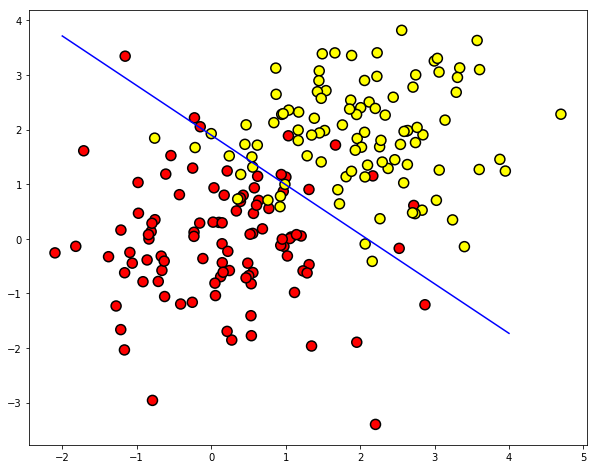

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:,0],train_data[:,1],c=train_labels,cmap='autumn',edgecolors='black',linewidths=1.5,s=100)
plt.plot(x[0],y[0],'b',linewidth=1.5)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
def get_grid(train_data):
    x_min,x_max = np.min(train_data[:,0])-1, np.max(train_data[:,0])+1
    y_min,y_max = np.min(train_data[:,1])-1, np.max(train_data[:,1])+1
    mesh=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
    return mesh

In [55]:
xx,yy=get_grid(train_data)

In [61]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(train_data,train_labels)
mesh_data=np.c_[xx.ravel(),yy.ravel()]
mesh_labels=dt_clf.predict(mesh_data).reshape(xx.shape)


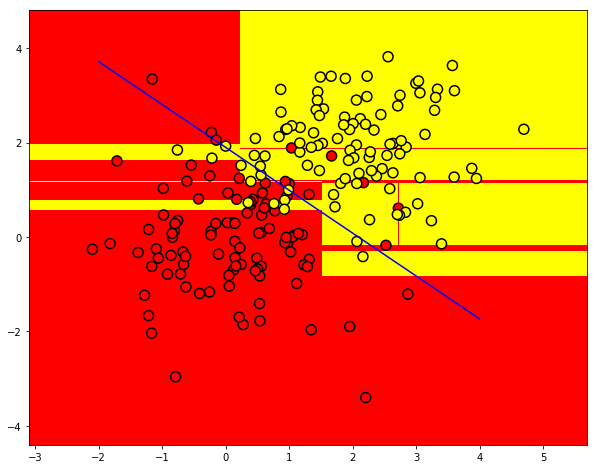

In [63]:
plt.figure(figsize=(10,8))
plt.pcolormesh(xx,yy,mesh_labels,cmap='autumn')
plt.scatter(train_data[:,0],train_data[:,1],c=train_labels,cmap='autumn',s=100,linewidth=1.5,edgecolors='black')
plt.plot(x[0],y[0],'b',linewidth=1.5)

In [64]:
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(dt_clf, feature_names=['x1', 'x2'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x070\x00\x00\x03\xf3\x08\x06\x00\x00\x00\xd8\xad\x9a\x83\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00@\x00IDATx\x01\xec\xdd\x07x\x15E\xd7\xc0\xf1\x93\x84\x84\x04\x08]z\xef\xbd)]DE\xe9R\xa4\x83\x82\xf8\xd1{\x15\x84\x97"\x82\x8a\x08"\x82H\x93\xaaH/R\xa4(H\x93\xde{5\xa1\x85N\x08\x10B\x12\xf2\xdd3x\xaf\xe9\x8d$\xa4\xfc\xe7yn\xee\xee\xec\xec\xec\xcco\x83\xaf\xaf\x873c\x17\x10\x10\xb0X(\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80@<\x10\xb0\xb3\x040\x03\xe2\xc18\x18\x02\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08  \xf6\x18 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\xf1E\x80\x00f|y\x13\x8c\x03\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\xc8\xc0\xe4w\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\xe2\x8f\x00\x19\x98\xf1\xe7]0\x12\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10H\xe4\x02\r\x1b6\x14;;;>\x18\xbc\x94\xdf\x81\x1f\x7f\xfc1\x91\xff\tcz\x08 \x80\x00\x02\x08 \x90X\x04\x92%\x96\x890\x0f\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@ !\x08T\xabVMz\xf6\xec\x99\x10\x86\xca\x18\x13\x91\xc0\xc7\x1f\x7f\x9c\x88f\xc3T\x10@\x00\x01\x04\x10@ \xb1\x0b\x10\xc0L\xeco\x98\xf9!\x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80@\xbc\x12\xc8\x95+\x974k\xd6,^\x8d\x89\xc1$~\x81\xae]\xbb&\xfeI2C\x04\x10@\x00\x01\x04\x10H4\x02,!\x9bh^%\x13A\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@ \xe1\x0b\x10\xc0L\xf8\xef\x90\x19 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x90h\x04\x08`&\x9aW\xc9D\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10H\xf8\x02\x040\x13\xfe;d\x06\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08$\x1a\x01\x02\x98\x89\xe6U2\x11\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x12\xbe\x00\x01\xcc\x84\xff\x0e\x99\x01\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x10\xab\x02\x0f\x1e<\x90\xcf?\xff\\\xde}\xf7]\xa9]\xbb\xb6|\xf9\xe5\x97\xe2\xe3\xe3\x13\xab\xcf\x8cj\xe7\x01\x01\x01\xb2t\xe9R3\xb6\xc8\xde\xbbm\xdb6i\xd3\xa6\x8d\xbc\xfe\xfa\xeb\xd2\xae];\xd9\xb7o_\x98\xb7^\xbdzUz\xf6\xec)\x97.]\n\xb5Mt\x9e\x1fjGT"\x80\x00\x02\x08 \x80\x00\x02\x08\x08\x01L~\t\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\xc2\x14\xf0\xf2\xf2\x92*U\xaa\xc8\xd8\xb1c\xe5\xe8\xd1\xa3\xb2a\xc3\x06\x192d\x88\xd4\xaaUK\x9e={\x16\xe6}qya\xd5\xaaUR\xb6lYi\xd6\xac\x99\xec\xdf\xbf?R\x8f\x9e={\xb6T\xaf^]\xb6o\xdf.\xbbw\xef\x96y\xf3\xe6I\xe5\xca\x95e\xe3\xc6\x8dA\xee\xbfq\xe3\x86\xf4\xe9\xd3G\n\x14( \x93\'O\x96\x87\x0f\x1f\x06\xb9\xae\'\xd1y~\x88N\xa8@\x00\x01\x04\x10@\x00\x01\x04\x10\xb0\t\x10\xc0\xb4Qp\x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x80\x00\x02\x08 \x10\\`\xcc\x981R\xbati\xb9}\xfb\xb6\\\xbbvMV\xae\\)\x8e\x8e\x8e\xf2\xd7_\x7f\xc9\xda\xb5k\x837\x8f\xf3s\r\xa2:99\xc9\xe8\xd1\xa3#\xfd\xec\xfb\xf7\xef\xcb\xa7\x9f~j\xe6\xe0\xee\xeen\xb2*\x1b5j$\xfe\xfe\xfe\xa6>pG:\xe7\xae]\xbbJ\xa5J\x95\x02W\xdb\x8e\xa3\xf3|\xdb\xcd\x1c \x80\x00\x02\x08 \x80\x00\x02\x08\x84*@\x003T\x16*\x11@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04\x10@\x00\x01\x04tY\xd4?\xfe\xf8C\xa6M\x9b&\xce\xce\xce\xe2\xe0\xe0 \r\x1b64\xcb\xc8\xaa\xce\xb1c\xc7\xa2\x85\xe4\xe7\xe7\'s\xe6\xcc\x91\x89\x13\'F\xeb\xfe\xc07\xd9\xdb\xdbK\x9d:u\xa4X\xb1b\x81\xab\xc3=^\xbe|\xb9\xf4\xeb\xd7O\xdex\xe3\r\xd3.g\xce\x9c2l\xd80s|\xfc\xf8\xf1 \xf7jfg\xe1\xc2\x85E\xdb\x84V\xa2\xf3\xfc\xd0\xfa\xa1\x0e\x01\x04\x10@\x00\x01\x04\x10@\xe0?\x81d\xff\x1dr\x84\x00\x02\x08 \x80\x00\x02\x08 \x